# Datenexploration für Schlafqualität-Vorhersage

In [6]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Modelle laden
loaded_rf_model = joblib.load('/Users/tommygrace/Desktop/Code/schlafqualitaet_vorhersage/models/random_forest_model.joblib')
loaded_xgb_model = joblib.load('/Users/tommygrace/Desktop/Code/schlafqualitaet_vorhersage/models/xgboost_model.joblib')
loaded_lr_model = joblib.load('/Users/tommygrace/Desktop/Code/schlafqualitaet_vorhersage/models/linear_regression_model.joblib')

# Testdaten laden
test_data = pd.read_csv('/Users/tommygrace/Desktop/Code/schlafqualitaet_vorhersage/data/test_data.csv')

# Feature Engineering für Testdaten
test_data['Caffeine_Squared'] = test_data['Caffeine_Intake_mg'] ** 2
test_data['Caffeine_Stress_Interaction'] = test_data['Caffeine_Intake_mg'] * test_data['Stress_Level']

# Trennen Sie die Features und die Zielvariable
X_test = test_data[['Caffeine_Intake_mg', 'Stress_Level', 'Caffeine_Squared', 'Caffeine_Stress_Interaction']]
X_test_simple = test_data[['Caffeine_Intake_mg']]  # Für das einfache lineare Modell
y_test = test_data['Sleep_Quality_Score']

# Vorhersagen mit Random Forest
rf_predictions = loaded_rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Vorhersagen mit XGBoost
xgb_predictions = loaded_xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

# Vorhersagen mit linearem Regressionsmodell
lr_predictions = loaded_lr_model.predict(X_test_simple)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("Random Forest auf Testdaten:")
print(f"MSE: {rf_mse:.4f}")
print(f"R²: {rf_r2:.4f}")

print("\nXGBoost auf Testdaten:")
print(f"MSE: {xgb_mse:.4f}")
print(f"R²: {xgb_r2:.4f}")

print("\nLineare Regression auf Testdaten:")
print(f"MSE: {lr_mse:.4f}")
print(f"R²: {lr_r2:.4f}")


Random Forest auf Testdaten:
MSE: 0.0742
R²: 0.9915

XGBoost auf Testdaten:
MSE: 0.0239
R²: 0.9973

Lineare Regression auf Testdaten:
MSE: 3.8999
R²: 0.5515


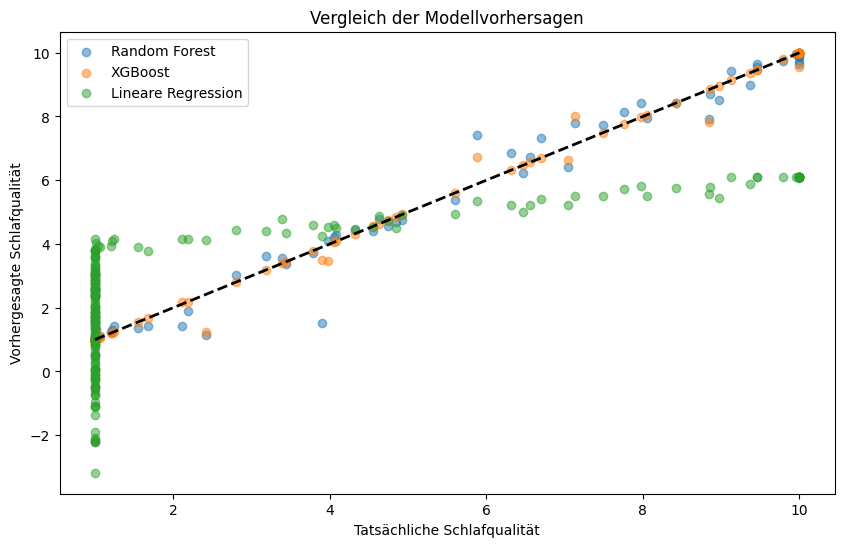

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, label='Random Forest', alpha=0.5)
plt.scatter(y_test, xgb_predictions, label='XGBoost', alpha=0.5)
plt.scatter(y_test, lr_predictions, label='Lineare Regression', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Tatsächliche Schlafqualität')
plt.ylabel('Vorhergesagte Schlafqualität')
plt.legend()
plt.title('Vergleich der Modellvorhersagen')
plt.show()

# Weitere Analysen hier hinzufügen

In [8]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# Testdaten laden
test_data = pd.read_csv('/Users/tommygrace/Desktop/Code/schlafqualitaet_vorhersage/data/test_data.csv')

# Feature Engineering für Testdaten
test_data['Caffeine_Squared'] = test_data['Caffeine_Intake_mg'] ** 2
test_data['Caffeine_Stress_Interaction'] = test_data['Caffeine_Intake_mg'] * test_data['Stress_Level']

# Trennen Sie die Features und die Zielvariable
X = test_data[['Caffeine_Intake_mg', 'Stress_Level', 'Caffeine_Squared', 'Caffeine_Stress_Interaction']]
X_simple = test_data[['Caffeine_Intake_mg']]  # Für das einfache lineare Modell
y = test_data['Sleep_Quality_Score']

# Definiere die Modelle
rf_model = RandomForestRegressor()
xgb_model = XGBRegressor()
lr_model = LinearRegression()

# Definiere die Kreuzvalidierungsmethode
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Kreuzvalidierung für Random Forest
rf_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='neg_mean_squared_error')
print(f"Random Forest MSE: {-rf_scores.mean():.4f} (+/- {rf_scores.std():.4f})")

# Kreuzvalidierung für XGBoost
xgb_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='neg_mean_squared_error')
print(f"XGBoost MSE: {-xgb_scores.mean():.4f} (+/- {xgb_scores.std():.4f})")

# Kreuzvalidierung für Lineare Regression
lr_scores = cross_val_score(lr_model, X_simple, y, cv=kf, scoring='neg_mean_squared_error')
print(f"Lineare Regression MSE: {-lr_scores.mean():.4f} (+/- {lr_scores.std():.4f})")

Random Forest MSE: 0.1601 (+/- 0.0834)
XGBoost MSE: 0.1685 (+/- 0.0656)
Lineare Regression MSE: 4.1552 (+/- 1.5157)


# Weitere modelle möchte ich hier testen

In [9]:
from sklearn.ensemble import VotingRegressor

# Definiere die Basismodelle
rf_model = RandomForestRegressor()
xgb_model = XGBRegressor()
lr_model = LinearRegression()

# Erstelle das Ensemble-Modell
ensemble_model = VotingRegressor(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('lr', lr_model)
])

# Kreuzvalidierung für das Ensemble-Modell
ensemble_scores = cross_val_score(ensemble_model, X, y, cv=kf, scoring='neg_mean_squared_error')
print(f"Ensemble Model MSE: {-ensemble_scores.mean():.4f} (+/- {ensemble_scores.std():.4f})")

Ensemble Model MSE: 0.2241 (+/- 0.0843)


In [10]:
from sklearn.ensemble import StackingRegressor

# Definiere das Stacking-Modell
stacking_model = StackingRegressor(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lr', lr_model)
    ],
    final_estimator=LinearRegression()
)

# Kreuzvalidierung für das Stacking-Modell
stacking_scores = cross_val_score(stacking_model, X, y, cv=kf, scoring='neg_mean_squared_error')
print(f"Stacking Model MSE: {-stacking_scores.mean():.4f} (+/- {stacking_scores.std():.4f})")

Stacking Model MSE: 0.1535 (+/- 0.0778)


# KNN Model


In [11]:
from sklearn.neighbors import KNeighborsRegressor

# Teste verschiedene Werte für K
k_values = [3, 5, 7, 11]
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_scores = cross_val_score(knn_model, X, y, cv=kf, scoring='neg_mean_squared_error')
    print(f"KNN (k={k}) MSE: {-knn_scores.mean():.4f} (+/- {knn_scores.std():.4f})")

KNN (k=3) MSE: 0.3587 (+/- 0.1683)
KNN (k=5) MSE: 0.3365 (+/- 0.1962)
KNN (k=7) MSE: 0.3496 (+/- 0.2220)
KNN (k=11) MSE: 0.4026 (+/- 0.3260)


In [12]:
# Teste verschiedene Distanzmetriken
distance_metrics = ['euclidean', 'manhattan']
for metric in distance_metrics:
    knn_model = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn_scores = cross_val_score(knn_model, X, y, cv=kf, scoring='neg_mean_squared_error')
    print(f"KNN (metric={metric}) MSE: {-knn_scores.mean():.4f} (+/- {knn_scores.std():.4f})")

KNN (metric=euclidean) MSE: 0.3365 (+/- 0.1962)
KNN (metric=manhattan) MSE: 0.2689 (+/- 0.0949)


# SVM Model


In [13]:
from sklearn.svm import SVR

# Teste verschiedene Kernel-Funktionen
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svr_model = SVR(kernel=kernel)
    svr_scores = cross_val_score(svr_model, X, y, cv=kf, scoring='neg_mean_squared_error')
    print(f"SVR (kernel={kernel}) MSE: {-svr_scores.mean():.4f} (+/- {svr_scores.std():.4f})")

SVR (kernel=linear) MSE: 1.2241 (+/- 0.5797)
SVR (kernel=poly) MSE: 1.2926 (+/- 0.4853)
SVR (kernel=rbf) MSE: 0.6352 (+/- 0.8964)


In [14]:
from sklearn.model_selection import GridSearchCV

# Definiere den Parameterbereich
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf']
}

# Führe die Grid-Suche durch
grid_search = GridSearchCV(SVR(), param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Beste Parameter und Ergebnis
print(f"Beste Parameter: {grid_search.best_params_}")
print(f"Beste MSE: {-grid_search.best_score_:.4f}")

Beste Parameter: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Beste MSE: 0.3348


In [15]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Testdaten laden
test_data = pd.read_csv('/Users/tommygrace/Desktop/Code/schlafqualitaet_vorhersage/data/test_data.csv')

# Feature Engineering für Testdaten
test_data['Caffeine_Squared'] = test_data['Caffeine_Intake_mg'] ** 2
test_data['Caffeine_Stress_Interaction'] = test_data['Caffeine_Intake_mg'] * test_data['Stress_Level']

# Trennen Sie die Features und die Zielvariable
X = test_data[['Caffeine_Intake_mg', 'Stress_Level', 'Caffeine_Squared', 'Caffeine_Stress_Interaction']]
X_simple = test_data[['Caffeine_Intake_mg']]  # Für das einfache lineare Modell
y = test_data['Sleep_Quality_Score']

# Definiere die Modelle
rf_model = RandomForestRegressor()
xgb_model = XGBRegressor()
lr_model = LinearRegression()

# Definiere die Kreuzvalidierungsmethode
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Kreuzvalidierung für Random Forest
rf_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='neg_mean_squared_error')
print(f"Random Forest MSE: {-rf_scores.mean():.4f} (+/- {rf_scores.std():.4f})")

# Kreuzvalidierung für XGBoost
xgb_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='neg_mean_squared_error')
print(f"XGBoost MSE: {-xgb_scores.mean():.4f} (+/- {xgb_scores.std():.4f})")

# Kreuzvalidierung für Lineare Regression
lr_scores = cross_val_score(lr_model, X_simple, y, cv=kf, scoring='neg_mean_squared_error')
print(f"Lineare Regression MSE: {-lr_scores.mean():.4f} (+/- {lr_scores.std():.4f})")

# Ensemble Modell
ensemble_model = VotingRegressor(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('lr', lr_model)
])
ensemble_scores = cross_val_score(ensemble_model, X, y, cv=kf, scoring='neg_mean_squared_error')
print(f"Ensemble Model MSE: {-ensemble_scores.mean():.4f} (+/- {ensemble_scores.std():.4f})")

# Stacking Modell
stacking_model = StackingRegressor(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lr', lr_model)
    ],
    final_estimator=LinearRegression()
)
stacking_scores = cross_val_score(stacking_model, X, y, cv=kf, scoring='neg_mean_squared_error')
print(f"Stacking Model MSE: {-stacking_scores.mean():.4f} (+/- {stacking_scores.std():.4f})")

# KNN Modell
k_values = [3, 5, 7, 11]
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_scores = cross_val_score(knn_model, X, y, cv=kf, scoring='neg_mean_squared_error')
    print(f"KNN (k={k}) MSE: {-knn_scores.mean():.4f} (+/- {knn_scores.std():.4f})")

# Teste verschiedene Distanzmetriken
distance_metrics = ['euclidean', 'manhattan']
for metric in distance_metrics:
    knn_model = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn_scores = cross_val_score(knn_model, X, y, cv=kf, scoring='neg_mean_squared_error')
    print(f"KNN (metric={metric}) MSE: {-knn_scores.mean():.4f} (+/- {knn_scores.std():.4f})")

# SVM Modell
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svr_model = SVR(kernel=kernel)
    svr_scores = cross_val_score(svr_model, X, y, cv=kf, scoring='neg_mean_squared_error')
    print(f"SVR (kernel={kernel}) MSE: {-svr_scores.mean():.4f} (+/- {svr_scores.std():.4f})")

# Hyperparameter-Optimierung für SVM
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf']
}
grid_search = GridSearchCV(SVR(), param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X, y)
print(f"Beste Parameter: {grid_search.best_params_}")
print(f"Beste MSE: {-grid_search.best_score_:.4f}")

# Speichere die Modelle
models_path = '/Users/tommygrace/Desktop/Code/schlafqualitaet_vorhersage/models/'

joblib.dump(rf_model, models_path + 'random_forest_model.joblib')
joblib.dump(xgb_model, models_path + 'xgboost_model.joblib')
joblib.dump(lr_model, models_path + 'linear_regression_model.joblib')
joblib.dump(ensemble_model, models_path + 'ensemble_model.joblib')
joblib.dump(stacking_model, models_path + 'stacking_model.joblib')
joblib.dump(knn_model, models_path + 'knn_model_k5.joblib')
joblib.dump(grid_search.best_estimator_, models_path + 'svm_best_model.joblib')

Random Forest MSE: 0.1631 (+/- 0.0803)
XGBoost MSE: 0.1685 (+/- 0.0656)
Lineare Regression MSE: 4.1552 (+/- 1.5157)
Ensemble Model MSE: 0.2257 (+/- 0.0835)
Stacking Model MSE: 0.1582 (+/- 0.0877)
KNN (k=3) MSE: 0.3587 (+/- 0.1683)
KNN (k=5) MSE: 0.3365 (+/- 0.1962)
KNN (k=7) MSE: 0.3496 (+/- 0.2220)
KNN (k=11) MSE: 0.4026 (+/- 0.3260)
KNN (metric=euclidean) MSE: 0.3365 (+/- 0.1962)
KNN (metric=manhattan) MSE: 0.2689 (+/- 0.0949)
SVR (kernel=linear) MSE: 1.2241 (+/- 0.5797)
SVR (kernel=poly) MSE: 1.2926 (+/- 0.4853)
SVR (kernel=rbf) MSE: 0.6352 (+/- 0.8964)
Beste Parameter: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Beste MSE: 0.3348


['/Users/tommygrace/Desktop/Code/schlafqualitaet_vorhersage/models/svm_best_model.joblib']

# Alle Modelle wwerden nun auf den testdaten evaluiert